Node features (x):
tensor([[0.6333, 0.0461, 0.3022],
        [0.8182, 0.9019, 0.8974],
        [0.3481, 0.9040, 0.3000],
        [0.0189, 0.5733, 0.4437],
        [0.5255, 0.0953, 0.1045]])
Edge index (edges between nodes):
tensor([[0, 1, 2],
        [3, 3, 4]])
Number of edges: 3


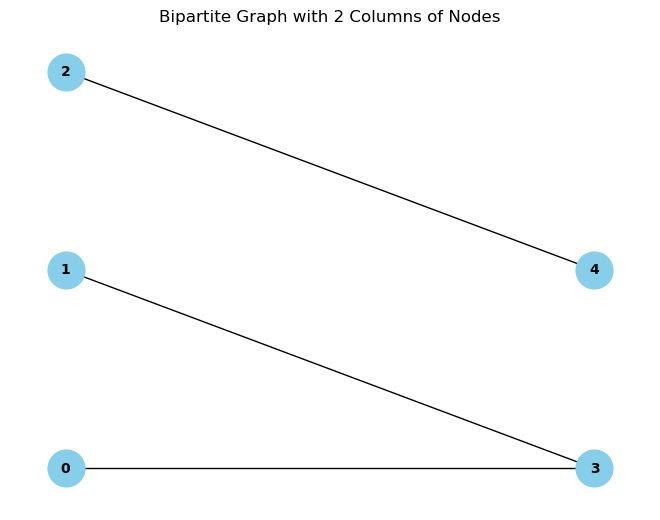

In [10]:
import torch
import random
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.data import Data

# Number of nodes
num_nodes_set_1 = 3  # Number of nodes in column 1
num_nodes_set_2 = 2  # Number of nodes in column 2
num_nodes = num_nodes_set_1 + num_nodes_set_2

# Create random node features for each node
x = torch.rand((num_nodes, 3))  # 3-dimensional features for each node

# Randomly generate edges between set_1 and set_2 (bipartite edges only)
edges = []
for i in range(num_nodes_set_1):  # Nodes in column 1
    for j in range(num_nodes_set_1, num_nodes):  # Nodes in column 2
        if random.random() > 0.5:  # Randomly decide if there's an edge
            edges.append((i, j))

# Convert edge list into tensor format required by PyTorch Geometric
edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()

# Create the graph data object
data = Data(x=x, edge_index=edge_index)

# Print the graph information
print(f"Node features (x):\n{x}")
print(f"Edge index (edges between nodes):\n{edge_index}")
print(f"Number of edges: {edge_index.size(1)}")

# Visualizing the bipartite graph using networkx
G = nx.Graph()

# Add nodes with features (for visualization)
for i in range(num_nodes):
    G.add_node(i, feature=x[i].tolist())

# Add edges to the graph
G.add_edges_from(edges)

# Positions for two columns of nodes
pos = {}
# Place nodes from set 1 in the first column (x = 0)
for i in range(num_nodes_set_1):
    pos[i] = (0, i)
# Place nodes from set 2 in the second column (x = 1)
for i in range(num_nodes_set_1, num_nodes):
    pos[i] = (1, i - num_nodes_set_1)

# Plot the bipartite graph
nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=10, font_weight='bold')
plt.title('Bipartite Graph with 2 Columns of Nodes')
plt.show()


Node features (x):
tensor([[0.0408, 0.0031, 0.5238],
        [0.5694, 0.2612, 0.6902],
        [0.0673, 0.2814, 0.2989],
        [0.5650, 0.4074, 0.7157],
        [0.7604, 0.7783, 0.2082]])
Edge index (edges between nodes):
tensor([[0, 0, 2],
        [3, 4, 4]])
Number of edges: 3


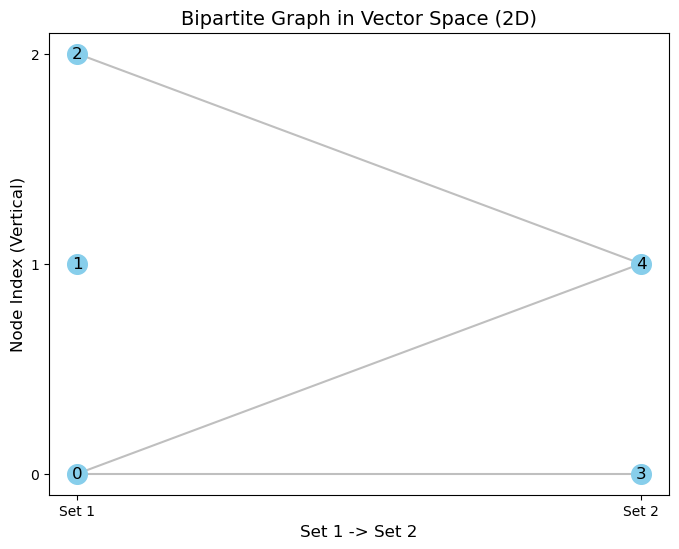

In [12]:
import torch
import random
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.data import Data

# Number of nodes
num_nodes_set_1 = 3  # Number of nodes in column 1
num_nodes_set_2 = 2  # Number of nodes in column 2
num_nodes = num_nodes_set_1 + num_nodes_set_2

# Create random node features for each node
x = torch.rand((num_nodes, 3))  # 3-dimensional features for each node

# Randomly generate edges between set_1 and set_2 (bipartite edges only)
edges = []
for i in range(num_nodes_set_1):  # Nodes in column 1
    for j in range(num_nodes_set_1, num_nodes):  # Nodes in column 2
        if random.random() > 0.5:  # Randomly decide if there's an edge
            edges.append((i, j))

# Convert edge list into tensor format required by PyTorch Geometric
edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()

# Create the graph data object
data = Data(x=x, edge_index=edge_index)

# Print the graph information
print(f"Node features (x):\n{x}")
print(f"Edge index (edges between nodes):\n{edge_index}")
print(f"Number of edges: {edge_index.size(1)}")

# Visualizing the bipartite graph as a vector space (2D plot)
G = nx.Graph()

# Add nodes with features (for visualization)
for i in range(num_nodes):
    G.add_node(i, feature=x[i].tolist())

# Add edges to the graph
G.add_edges_from(edges)

# Positions for two columns of nodes
pos = {}
# Place nodes from set 1 in the first column (x = 0)
for i in range(num_nodes_set_1):
    pos[i] = (0, i)  # y position of each node in set_1 will be different
# Place nodes from set 2 in the second column (x = 1)
for i in range(num_nodes_set_1, num_nodes):
    pos[i] = (1, i - num_nodes_set_1)  # y position for set_2

# Plot the bipartite graph as a vector space (2D)
plt.figure(figsize=(8, 6))

# Draw the edges in the plot
for edge in edges:
    node1, node2 = edge
    x_vals = [pos[node1][0], pos[node2][0]]
    y_vals = [pos[node1][1], pos[node2][1]]
    plt.plot(x_vals, y_vals, color='gray', alpha=0.5)  # Draw edge lines

# Draw the nodes in the plot
for node in range(num_nodes):
    plt.scatter(pos[node][0], pos[node][1], s=200, c='skyblue', label=f"Node {node}" if node == 0 else "", zorder=3)
    plt.text(pos[node][0], pos[node][1], str(node), fontsize=12, ha='center', va='center', zorder=4)

# Label the axes
plt.title('Bipartite Graph in Vector Space (2D)', fontsize=14)
plt.xlabel('Set 1 -> Set 2', fontsize=12)
plt.ylabel('Node Index (Vertical)', fontsize=12)

# Remove axis ticks
plt.xticks([0, 1], ['Set 1', 'Set 2'])
plt.yticks(range(max(num_nodes_set_1, num_nodes_set_2)))

# Show the plot
plt.grid(False)
plt.show()


In [13]:
import random
import torch
import numpy as np

# Number of nodes in Set 1 and Set 2
num_nodes_set_1 = 3
num_nodes_set_2 = 2

# Randomly generate edges between Set 1 and Set 2 (bipartite edges only)
edges = []
for i in range(num_nodes_set_1):  # Nodes in Set 1
    for j in range(num_nodes_set_1, num_nodes_set_1 + num_nodes_set_2):  # Nodes in Set 2
        if random.random() > 0.5:  # Randomly decide if there's an edge
            edges.append((i, j))

# Adjacency matrix representation for edges between Set 1 and Set 2
adj_matrix = np.zeros((num_nodes_set_1, num_nodes_set_2))
for edge in edges:
    i, j = edge
    adj_matrix[i, j - num_nodes_set_1] = 1  # j is shifted by num_nodes_set_1

# Define the likelihood function
def log_likelihood(p, adj_matrix):
    """
    Compute the log-likelihood of the observed bipartite graph with given edge probability p.
    
    :param p: The probability of an edge between two nodes.
    :param adj_matrix: The adjacency matrix of the graph, where each entry is 1 if an edge exists, else 0.
    :return: The log-likelihood value.
    """
    num_edges = np.sum(adj_matrix)  # Total number of edges in the graph
    total_possible_edges = adj_matrix.size  # Total number of possible edges in the bipartite graph

    # Compute log-likelihood
    log_likelihood_value = num_edges * np.log(p) + (total_possible_edges - num_edges) * np.log(1 - p)
    return log_likelihood_value

# Estimate p using Maximum Likelihood Estimate (MLE)
def mle_estimate(adj_matrix):
    """
    Estimate the edge probability p using MLE for a bipartite graph.
    
    :param adj_matrix: The adjacency matrix of the graph.
    :return: Estimated probability p.
    """
    num_edges = np.sum(adj_matrix)  # Number of observed edges
    total_possible_edges = adj_matrix.size  # Total number of possible edges
    
    # MLE for p is the ratio of observed edges to total possible edges
    p_mle = num_edges / total_possible_edges
    return p_mle

# Compute the MLE estimate for p
p_mle = mle_estimate(adj_matrix)
print(f"Maximum Likelihood Estimate for p: {p_mle}")

# Compute the log-likelihood for a specific value of p
p = 0.6  # Example probability
log_likelihood_value = log_likelihood(p, adj_matrix)
print(f"Log-Likelihood for p = {p}: {log_likelihood_value}")


Maximum Likelihood Estimate for p: 0.3333333333333333
Log-Likelihood for p = 0.6: -4.686814175028601


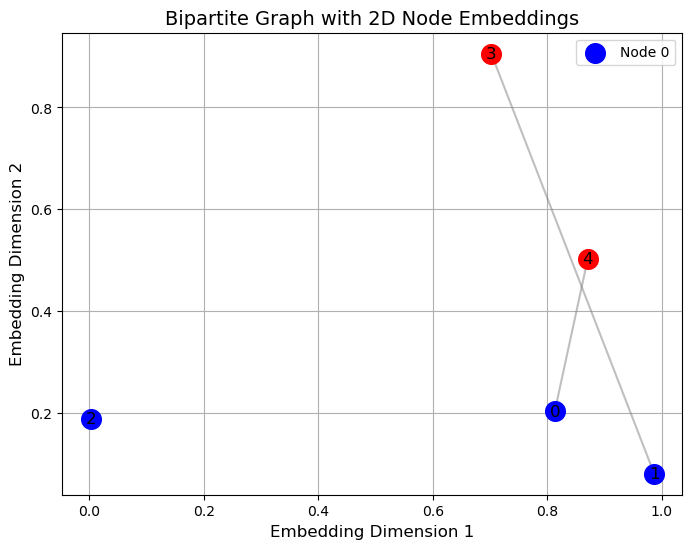

In [20]:
import torch
import random
import matplotlib.pyplot as plt
import numpy as np
from torch_geometric.data import Data

# Step 1: Define the bipartite graph
num_nodes_set_1 = 3  # Set 1 has 3 nodes
num_nodes_set_2 = 2  # Set 2 has 2 nodes
num_nodes = num_nodes_set_1 + num_nodes_set_2

# Step 2: Randomly generate edges between Set 1 and Set 2 (bipartite edges only)
edges = []
for i in range(num_nodes_set_1):  # Nodes in Set 1
    for j in range(num_nodes_set_1, num_nodes_set_1 + num_nodes_set_2):  # Nodes in Set 2
        if random.random() > 0.5:  # Randomly decide if there's an edge
            edges.append((i, j))

# Step 3: Assign random 2D embeddings to the nodes
x = torch.rand((num_nodes, 2))  # 2-dimensional feature vectors (embeddings) for each node

# Step 4: Convert edge list into tensor format required by PyTorch Geometric
edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()

# Create the graph data object
data = Data(x=x, edge_index=edge_index)

# Step 5: Visualizing the graph with node embeddings

plt.figure(figsize=(8, 6))

# Plot nodes with color depending on their set
for node in range(num_nodes):
    # Color nodes from Set 1 as blue, Set 2 as red
    color = 'blue' if node < num_nodes_set_1 else 'red'
    plt.scatter(x[node][0], x[node][1], s=200, c=color, label=f"Node {node}" if node == 0 else "", zorder=3)
    plt.text(x[node][0], x[node][1], str(node), fontsize=12, ha='center', va='center', zorder=4)

# Plot edges
for edge in edges:
    node1, node2 = edge
    x_vals = [x[node1][0].item(), x[node2][0].item()]
    y_vals = [x[node1][1].item(), x[node2][1].item()]
    plt.plot(x_vals, y_vals, color='gray', alpha=0.5)  # Draw edge lines

# Label the plot
plt.title('Bipartite Graph with 2D Node Embeddings', fontsize=14)
plt.xlabel('Embedding Dimension 1', fontsize=12)
plt.ylabel('Embedding Dimension 2', fontsize=12)

# Show legend and grid
plt.legend(loc='best')
plt.grid(True)

# Show the plot
plt.show()


AttributeError: 'GlobalStorage' object has no attribute 'adjacency'

MLE for edge probability p: 0.5
Likelihood of an edge between node 0 in Set 1 and node 3 in Set 2: 0.5


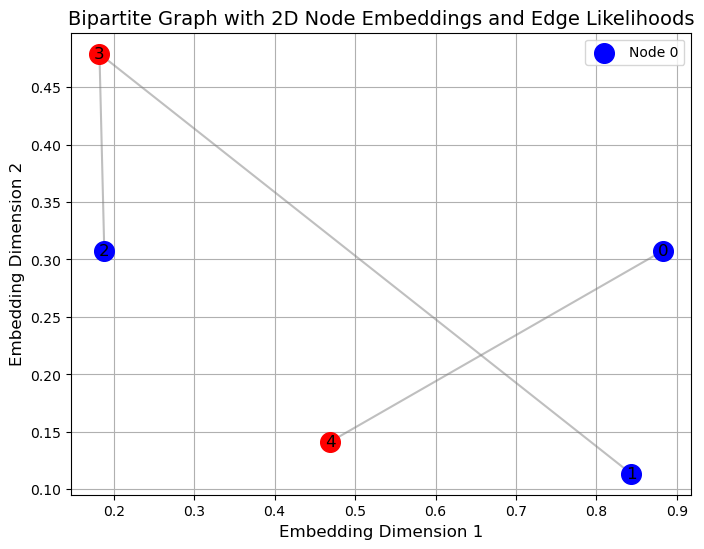

In [25]:
import torch
import random
import numpy as np
import matplotlib.pyplot as plt
from torch_geometric.data import Data

# Step 1: Define the bipartite graph
num_nodes_set_1 = 3  # Set 1 has 3 nodes
num_nodes_set_2 = 2  # Set 2 has 2 nodes
num_nodes = num_nodes_set_1 + num_nodes_set_2

# Step 2: Randomly generate edges between Set 1 and Set 2 (bipartite edges only)
edges = []
for i in range(num_nodes_set_1):  # Nodes in Set 1
    for j in range(num_nodes_set_1, num_nodes_set_1 + num_nodes_set_2):  # Nodes in Set 2
        if random.random() > 0.5:  # Randomly decide if there's an edge
            edges.append((i, j))

# Step 3: Assign random 2D embeddings to the nodes
x = torch.rand((num_nodes, 2))  # 2-dimensional feature vectors (embeddings) for each node

# Step 4: Create adjacency matrix
adj_matrix = np.zeros((num_nodes_set_1, num_nodes_set_2))
for edge in edges:
    i, j = edge
    adj_matrix[i, j - num_nodes_set_1] = 1  # j is shifted by num_nodes_set_1

# Maximum likelihood estimate (MLE) for p
def mle_estimate(adj_matrix):
    """
    Estimate the edge probability p using Maximum Likelihood Estimation for a bipartite graph.
    
    :param adj_matrix: The adjacency matrix of the graph.
    :return: Estimated probability p of an edge.
    """
    num_edges = np.sum(adj_matrix)  # Number of observed edges
    total_possible_edges = adj_matrix.size  # Total number of possible edges between Set 1 and Set 2
    
    # MLE for p is the ratio of observed edges to total possible edges
    p_mle = num_edges / total_possible_edges
    return p_mle

# Estimate p using MLE
p_mle = mle_estimate(adj_matrix)

# Print the MLE for p
print(f"MLE for edge probability p: {p_mle}")

# Step 5: Visualizing the graph with node embeddings

plt.figure(figsize=(8, 6))

# Plot nodes with color depending on their set
for node in range(num_nodes):
    # Color nodes from Set 1 as blue, Set 2 as red
    color = 'blue' if node < num_nodes_set_1 else 'red'
    plt.scatter(x[node][0], x[node][1], s=200, c=color, label=f"Node {node}" if node == 0 else "", zorder=3)
    plt.text(x[node][0], x[node][1], str(node), fontsize=12, ha='center', va='center', zorder=4)

# Plot edges
for edge in edges:
    node1, node2 = edge
    x_vals = [x[node1][0].item(), x[node2][0].item()]
    y_vals = [x[node1][1].item(), x[node2][1].item()]
    plt.plot(x_vals, y_vals, color='gray', alpha=0.5)  # Draw edge lines

# Step 6: Compute and visualize likelihood of a random edge
def likelihood(p, adj_matrix, i, j):
    """
    Compute the likelihood that an edge exists between nodes i and j based on the MLE.
    
    :param p: The estimated probability of an edge.
    :param adj_matrix: The adjacency matrix.
    :param i: Index of node in Set 1.
    :param j: Index of node in Set 2.
    :return: The likelihood of the edge (i, j) existing.
    """
    if adj_matrix[i, j - num_nodes_set_1] == 1:  # Edge exists
        return p
    else:  # Edge does not exist
        return 1 - p

# Example: Compute the likelihood that an edge exists between nodes 0 in Set 1 and 3 in Set 2
i = 0  # Node 0 in Set 1
j = 3  # Node 3 in Set 2 (shifted by num_nodes_set_1)
edge_likelihood = likelihood(p_mle, adj_matrix, i, j)

# Display likelihood
print(f"Likelihood of an edge between node {i} in Set 1 and node {j} in Set 2: {edge_likelihood}")

# Label the plot
plt.title('Bipartite Graph with 2D Node Embeddings and Edge Likelihoods', fontsize=14)
plt.xlabel('Embedding Dimension 1', fontsize=12)
plt.ylabel('Embedding Dimension 2', fontsize=12)

# Show legend and grid
plt.legend(loc='best')
plt.grid(True)

# Show the plot
plt.show()


Edge Probabilities (based on latent distances):
[[0.47233361 0.38464567]
 [0.3140991  0.41993609]
 [0.39711034 0.45120448]]


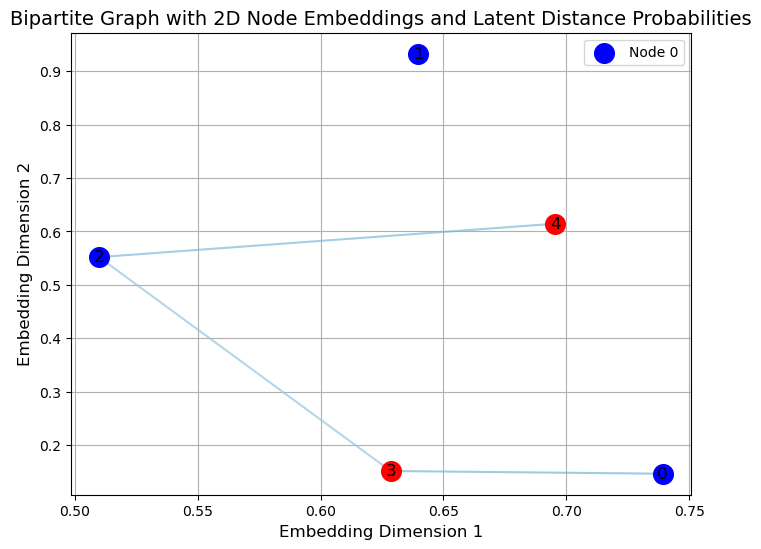

In [ ]:
import torch
import random
import numpy as np
import matplotlib.pyplot as plt
from torch_geometric.data import Data

# Step 1: Define the bipartite graph
num_nodes_set_1 = 3  # Set 1 has 3 nodes
num_nodes_set_2 = 2  # Set 2 has 2 nodes
num_nodes = num_nodes_set_1 + num_nodes_set_2

# Step 2: Randomly generate edges between Set 1 and Set 2 (bipartite edges only)
edges = []
for i in range(num_nodes_set_1):  # Nodes in Set 1
    for j in range(num_nodes_set_1, num_nodes_set_1 + num_nodes_set_2):  # Nodes in Set 2
        if random.random() > 0.5:  # Randomly decide if there's an edge
            edges.append((i, j))

# Step 3: Assign random 2D embeddings to the nodes
x = torch.rand((num_nodes, 2))  # 2-dimensional feature vectors (embeddings) for each node

# Step 4: Create adjacency matrix
adj_matrix = np.zeros((num_nodes_set_1, num_nodes_set_2))
for edge in edges:
    i, j = edge
    adj_matrix[i, j - num_nodes_set_1] = 1  # j is shifted by num_nodes_set_1

# Latent distance calculation (Euclidean Distance)
def latent_distance(x_i, x_j):
    """
    Calculate the Euclidean distance between two node embeddings.
    
    :param x_i: Embedding of node i.
    :param x_j: Embedding of node j.
    :return: Euclidean distance between the embeddings.
    """
    return torch.norm(x_i - x_j)

# Sigmoid function to convert latent distance to probability
def sigmoid(z):
    return 1 / (1 + torch.exp(-z))

# Compute latent distance probabilities
def compute_edge_probability(x, adj_matrix):
    """
    Compute the edge probability between all pairs of nodes based on their latent distance.
    
    :param x: The 2D embeddings of nodes.
    :param adj_matrix: The adjacency matrix of the graph.
    :return: A matrix of edge probabilities based on latent distance.
    """
    edge_probabilities = np.zeros_like(adj_matrix, dtype=float)
    
    for i in range(num_nodes_set_1):  # Nodes in Set 1
        for j in range(num_nodes_set_1, num_nodes_set_1 + num_nodes_set_2):  # Nodes in Set 2
            distance = latent_distance(x[i], x[j])
            prob = sigmoid(-distance)  # Use sigmoid to convert distance to probability
            edge_probabilities[i, j - num_nodes_set_1] = prob
    
    return edge_probabilities

# Compute edge probabilities based on latent distances
edge_probabilities = compute_edge_probability(x, adj_matrix)

# Print the edge probabilities
print("Edge Probabilities (based on latent distances):")
print(edge_probabilities)

# Step 5: Visualizing the graph with node embeddings and edge probabilities

plt.figure(figsize=(8, 6))

# Plot nodes with color depending on their set
for node in range(num_nodes):
    # Color nodes from Set 1 as blue, Set 2 as red
    color = 'blue' if node < num_nodes_set_1 else 'red'
    plt.scatter(x[node][0], x[node][1], s=200, c=color, label=f"Node {node}" if node == 0 else "", zorder=3)
    plt.text(x[node][0], x[node][1], str(node), fontsize=12, ha='center', va='center', zorder=4)

# Plot edges with probabilities based on latent distance
for edge in edges:
    node1, node2 = edge
    x_vals = [x[node1][0].item(), x[node2][0].item()]
    y_vals = [x[node1][1].item(), x[node2][1].item()]
    prob = edge_probabilities[node1, node2 - num_nodes_set_1]
    
    # Set edge color intensity based on the probability
    plt.plot(x_vals, y_vals, color=plt.cm.Blues(prob), alpha=0.7)  # More intense blue for higher probability

# Label the plot
plt.title('Bipartite Graph with 2D Node Embeddings and Latent Distance Probabilities', fontsize=14)
plt.xlabel('Embedding Dimension 1', fontsize=12)
plt.ylabel('Embedding Dimension 2', fontsize=12)

# Show legend and grid
plt.legend(loc='best')
plt.grid(True)

# Show the plot
plt.show()

Graph edges: [('a1', 'b1'), ('a1', 'b2'), ('a1', 'b3'), ('a1', 'b4'), ('a2', 'b0'), ('a2', 'b2'), ('a4', 'b3'), ('a4', 'b4')]
Sample random walks (metapath2vec style):
['a0']
['a1', 'b4', 'a4', 'b3', 'a1', 'b1']
['a2', 'b0', 'a2', 'b2', 'a1', 'b2']
['a3']
['a4', 'b4', 'a1', 'b1', 'a1', 'b4']
Learned node embeddings shape: torch.Size([10, 16])
Epoch 20/200, Loss: 0.5335
Epoch 40/200, Loss: 0.4745
Epoch 60/200, Loss: 0.4737
Epoch 80/200, Loss: 0.4733
Epoch 100/200, Loss: 0.4733
Epoch 120/200, Loss: 0.4733
Epoch 140/200, Loss: 0.4733
Epoch 160/200, Loss: 0.4733
Epoch 180/200, Loss: 0.4733
Epoch 200/200, Loss: 0.4733
Edge prediction accuracy (on training pairs): 0.6800000071525574


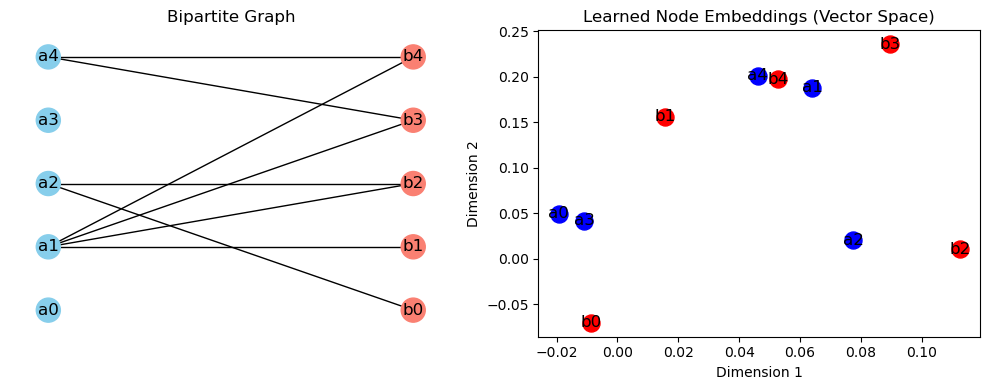

In [3]:
import random
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
import torch
import torch.nn as nn
import torch.optim as optim

# ----------------------------
# Step 1. Create a bipartite graph with two columns of nodes
# ----------------------------

num_nodes_set_1 = 5  # Column 1 (Set 1)
num_nodes_set_2 = 5  # Column 2 (Set 2)
nodes_set_1 = [f"a{i}" for i in range(num_nodes_set_1)]
nodes_set_2 = [f"b{j}" for j in range(num_nodes_set_2)]
all_nodes = nodes_set_1 + nodes_set_2

# Create an undirected bipartite graph
G = nx.Graph()
G.add_nodes_from(nodes_set_1, bipartite=0)
G.add_nodes_from(nodes_set_2, bipartite=1)

# Randomly add edges only between nodes of Set 1 and Set 2
edges = []
for u in nodes_set_1:
    for v in nodes_set_2:
        if random.random() > 0.5:
            G.add_edge(u, v)
            edges.append((u, v))

print("Graph edges:", edges)

# ----------------------------
# Step 2. Generate random walks (metapath-style)
# ----------------------------
# For a bipartite graph, a common metapath is: Set1 -> Set2 -> Set1 -> Set2 -> ...
# We'll generate random walks that alternate between the sets.

def generate_random_walks(G, nodes, walk_length=6, num_walks=10):
    walks = []
    for _ in range(num_walks):
        for node in nodes:
            walk = [node]
            current = node
            for _ in range(walk_length - 1):
                # Get neighbors and sample randomly
                nbrs = list(G.neighbors(current))
                if len(nbrs) == 0:
                    break
                current = random.choice(nbrs)
                walk.append(current)
            walks.append(walk)
    return walks

# Generate walks starting from all nodes
walks = generate_random_walks(G, all_nodes, walk_length=6, num_walks=10)
print("Sample random walks (metapath2vec style):")
for walk in walks[:5]:
    print(walk)

# ----------------------------
# Step 3. Learn node embeddings using Word2Vec (metapath2vec style)
# ----------------------------

# Treat each walk as a "sentence"
model = Word2Vec(walks, vector_size=16, window=3, min_count=0, sg=1, workers=1, epochs=100)

# Get embeddings for each node
embeddings = {}
for node in all_nodes:
    embeddings[node] = model.wv[node]

# Convert embeddings into a torch tensor mapping for later use.
# We'll order nodes as in all_nodes.
emb_matrix = torch.tensor(np.array([embeddings[node] for node in all_nodes]), dtype=torch.float)
print("Learned node embeddings shape:", emb_matrix.shape)

# ----------------------------
# Step 4. Maximum Likelihood Edge Prediction using logistic regression
# ----------------------------
# We will predict the probability that an edge exists between a node in Set 1 and a node in Set 2.
# We use a simple logistic regression model that takes the dot product of the embeddings,
# applies a sigmoid, and then we train it via maximum likelihood (binary cross entropy).

# Prepare training data: pairs of nodes (from different sets) and their labels (1 if edge exists, 0 otherwise)
train_pairs = []
labels = []
for u in nodes_set_1:
    for v in nodes_set_2:
        train_pairs.append((all_nodes.index(u), all_nodes.index(v)))
        labels.append(1 if G.has_edge(u, v) else 0)
labels = torch.tensor(labels, dtype=torch.float)

# Define a simple logistic model that takes a pair of embeddings and outputs a probability.
class EdgePredictor(nn.Module):
    def __init__(self, emb_dim):
        super(EdgePredictor, self).__init__()
        # Optionally, you can add more parameters; here we simply use the dot product.
        self.bias = nn.Parameter(torch.zeros(1))
    
    def forward(self, emb_u, emb_v):
        # Dot product of embeddings plus bias
        score = (emb_u * emb_v).sum(dim=1) + self.bias
        return torch.sigmoid(score)

model_edge = EdgePredictor(emb_dim=16)
criterion = nn.BCELoss()
optimizer = optim.Adam(model_edge.parameters(), lr=0.05)

# Prepare training embeddings for each pair
u_indices = torch.tensor([p[0] for p in train_pairs])
v_indices = torch.tensor([p[1] for p in train_pairs])
emb_u = emb_matrix[u_indices]
emb_v = emb_matrix[v_indices]

# Train the logistic regression edge predictor
num_epochs = 200
for epoch in range(num_epochs):
    optimizer.zero_grad()
    pred = model_edge(emb_u, emb_v)
    loss = criterion(pred, labels)
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 20 == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}")

# Evaluate the predictions
with torch.no_grad():
    pred_probs = model_edge(emb_u, emb_v)
    pred_labels = (pred_probs >= 0.5).float()
    accuracy = (pred_labels == labels).float().mean().item()
    print("Edge prediction accuracy (on training pairs):", accuracy)

# ----------------------------
# Visualize the bipartite graph and embedding space
# ----------------------------

plt.figure(figsize=(10, 4))

# Plot the bipartite graph (using networkx layout for clarity)
plt.subplot(1, 2, 1)
pos = {}
# Manually place nodes in two columns
for i, node in enumerate(nodes_set_1):
    pos[node] = (0, i)
for i, node in enumerate(nodes_set_2):
    pos[node] = (1, i)
nx.draw(G, pos, with_labels=True, node_color=['skyblue' if n in nodes_set_1 else 'salmon' for n in G.nodes()])
plt.title("Bipartite Graph")

# Plot the embedding space (projected via learned embeddings)
plt.subplot(1, 2, 2)
emb_array = emb_matrix.detach().numpy()
for idx, node in enumerate(all_nodes):
    color = 'blue' if node in nodes_set_1 else 'red'
    plt.scatter(emb_array[idx, 0], emb_array[idx, 1], c=color, s=150)
    plt.text(emb_array[idx, 0], emb_array[idx, 1], node, fontsize=12, ha='center', va='center')
plt.title("Learned Node Embeddings (Vector Space)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.tight_layout()
plt.show()


Graph edges: [('a0', 'b1'), ('a0', 'b2'), ('a0', 'b3'), ('a1', 'b2'), ('a1', 'b3'), ('a1', 'b4'), ('a2', 'b1'), ('a2', 'b2'), ('a3', 'b2'), ('a4', 'b0')]
Epoch 20/200, Loss: 0.2875
Epoch 40/200, Loss: 0.1334
Epoch 60/200, Loss: 0.1175
Epoch 80/200, Loss: 0.1083
Epoch 100/200, Loss: 0.1015
Epoch 120/200, Loss: 0.0947
Epoch 140/200, Loss: 0.0866
Epoch 160/200, Loss: 0.0767
Epoch 180/200, Loss: 0.0683
Epoch 200/200, Loss: 0.0623
Edge prediction accuracy: 0.9599999785423279


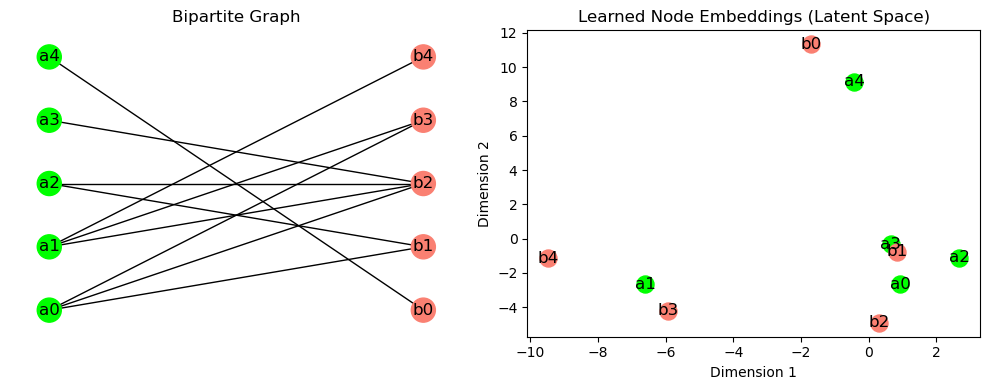

In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
from torch_geometric.utils import from_networkx

# ----------------------------
# Step 1. Create a Bipartite Graph in PyG Format
# ----------------------------
# generate seed
torch.manual_seed(42)
np.random.seed(42)
# Define nodes in two sets
num_nodes_set_1 = 5  # Column 1
num_nodes_set_2 = 5  # Column 2
nodes_set_1 = [f"a{i}" for i in range(num_nodes_set_1)]
nodes_set_2 = [f"b{j}" for j in range(num_nodes_set_2)]
all_nodes = nodes_set_1 + nodes_set_2

# Create a bipartite graph using NetworkX
G = nx.Graph()
G.add_nodes_from(nodes_set_1, bipartite=0)
G.add_nodes_from(nodes_set_2, bipartite=1)

# Randomly add edges between Set 1 and Set 2
edges = []
for u in nodes_set_1:
    for v in nodes_set_2:
        if np.random.rand() > 0.5:  # Randomly add edge with 50% probability
            G.add_edge(u, v)
            edges.append((u, v))

print("Graph edges:", edges)

# Convert node names to integer indices
node_to_index = {node: i for i, node in enumerate(all_nodes)}
edge_index = torch.tensor([[node_to_index[u], node_to_index[v]] for u, v in edges], dtype=torch.long).t()

# Create feature matrix (dummy features: identity matrix for now)
num_nodes = len(all_nodes)
x = torch.eye(num_nodes)

# Convert NetworkX graph to PyTorch Geometric format
data = Data(x=x, edge_index=edge_index)

# ----------------------------
# Step 2. Define a GNN for Learning Node Embeddings
# ----------------------------

class GNNEncoder(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GNNEncoder, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index).relu()
        x = self.conv2(x, edge_index)
        return x  # Final node embeddings

embedding_dim = 2  # Latent space dimension
model = GNNEncoder(input_dim=num_nodes, hidden_dim=32, output_dim=embedding_dim)

# ----------------------------
# Step 3. Train an Edge Prediction Model using Maximum Likelihood
# ----------------------------

class EdgePredictor(nn.Module):
    def __init__(self):
        super(EdgePredictor, self).__init__()
        self.sigmoid = nn.Sigmoid()

    def forward(self, emb_u, emb_v):
        # Use dot product similarity for link prediction
        score = (emb_u * emb_v).sum(dim=1)
        return self.sigmoid(score)

edge_predictor = EdgePredictor()
optimizer = optim.Adam(list(model.parameters()) + list(edge_predictor.parameters()), lr=0.01)
criterion = nn.BCELoss()

# Prepare training data: pairs of nodes and labels (1 if edge exists, 0 otherwise)
train_pairs = []
labels = []

for u in nodes_set_1:
    for v in nodes_set_2:
        train_pairs.append((node_to_index[u], node_to_index[v]))
        labels.append(1 if (u, v) in edges else 0)

labels = torch.tensor(labels, dtype=torch.float)

# Convert training pairs to tensor indices
u_indices = torch.tensor([p[0] for p in train_pairs])
v_indices = torch.tensor([p[1] for p in train_pairs])

# Training Loop
num_epochs = 200
for epoch in range(num_epochs):
    optimizer.zero_grad()
    embeddings = model(data.x, data.edge_index)  # Get node embeddings
    emb_u = embeddings[u_indices]
    emb_v = embeddings[v_indices]
    pred = edge_predictor(emb_u, emb_v)
    
    loss = criterion(pred, labels)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 20 == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}")

# Evaluate the model
with torch.no_grad():
    pred_probs = edge_predictor(embeddings[u_indices], embeddings[v_indices])
    pred_labels = (pred_probs >= 0.5).float()
    accuracy = (pred_labels == labels).float().mean().item()
    print("Edge prediction accuracy:", accuracy)

# ----------------------------
# Step 4. Visualizing the Latent Space
# ----------------------------

# Reduce to 2D for visualization (pick first two dimensions)
emb_array = embeddings.detach().numpy()

plt.figure(figsize=(10, 4))

# Plot original bipartite graph
plt.subplot(1, 2, 1)
pos = {}
for i, node in enumerate(nodes_set_1):
    pos[node] = (0, i)
for i, node in enumerate(nodes_set_2):
    pos[node] = (1, i)
nx.draw(G, pos, with_labels=True, node_color=['lime' if n in nodes_set_1 else 'salmon' for n in G.nodes()])
plt.title("Bipartite Graph")

# Plot latent space embeddings
plt.subplot(1, 2, 2)
for idx, node in enumerate(all_nodes):
    color = 'lime' if node in nodes_set_1 else 'salmon'
    plt.scatter(emb_array[idx, 0], emb_array[idx, 1], c=color, s=150)
    plt.text(emb_array[idx, 0], emb_array[idx, 1], node, fontsize=12, ha='center', va='center')
plt.title("Learned Node Embeddings (Latent Space)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.tight_layout()
plt.show()


In [7]:
node_to_index

{'a0': 0,
 'a1': 1,
 'a2': 2,
 'a3': 3,
 'a4': 4,
 'b0': 5,
 'b1': 6,
 'b2': 7,
 'b3': 8,
 'b4': 9}

Graph edges: [('a0', 'b4'), ('a1', 'b2'), ('a1', 'b3'), ('a1', 'b4'), ('a2', 'b2'), ('a2', 'b4'), ('a3', 'b2'), ('a3', 'b4'), ('a4', 'b0'), ('a4', 'b2'), ('a4', 'b3'), ('a4', 'b4')]
Sample metapath2vec random walks:
['a0', 'b4', 'a2', 'b4', 'a0', 'b4', 'a4', 'b0', 'a4', 'b2']
['a1', 'b3', 'a1', 'b3', 'a1', 'b4', 'a3', 'b2', 'a3', 'b2']
['a2', 'b2', 'a2', 'b4', 'a4', 'b2', 'a2', 'b2', 'a1', 'b2']
['a3', 'b2', 'a4', 'b4', 'a0', 'b4', 'a0', 'b4', 'a2', 'b2']
['a4', 'b4', 'a2', 'b2', 'a4', 'b2', 'a1', 'b4', 'a1', 'b3']
Learned node embeddings shape: torch.Size([10, 16])
Epoch 20/200, Loss: 0.5974
Epoch 40/200, Loss: 0.5818
Epoch 60/200, Loss: 0.5809
Epoch 80/200, Loss: 0.5807
Epoch 100/200, Loss: 0.5807
Epoch 120/200, Loss: 0.5807
Epoch 140/200, Loss: 0.5807
Epoch 160/200, Loss: 0.5807
Epoch 180/200, Loss: 0.5807
Epoch 200/200, Loss: 0.5807
Edge prediction accuracy: 0.6800000071525574


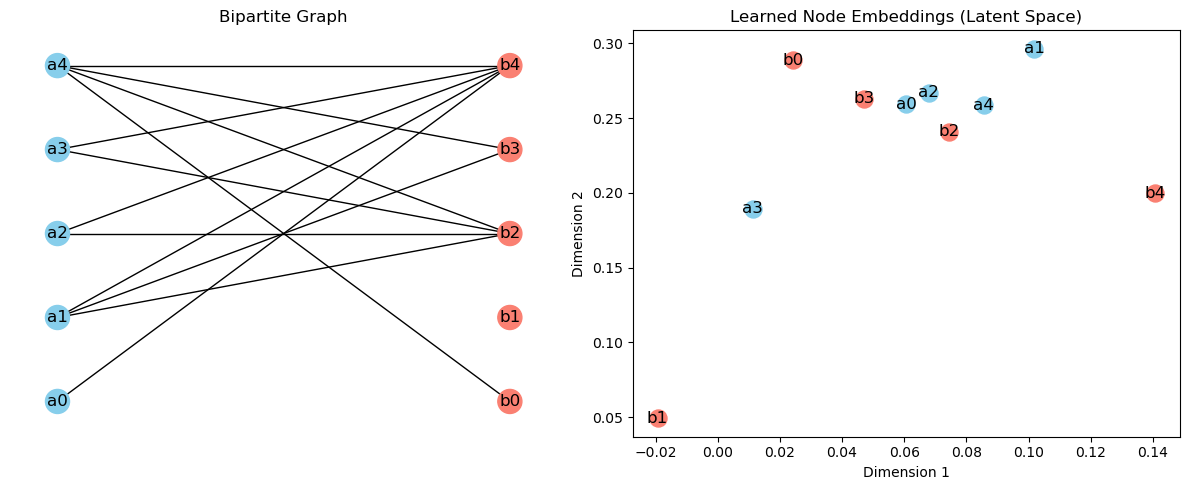

In [19]:
import random
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch_geometric.data import Data
from gensim.models import Word2Vec

# ----------------------------
# Step 1: Create a Bipartite Graph using PyTorch Geometric
# ----------------------------

# Define two sets of nodes (we label them with strings to later use in Word2Vec)
num_nodes_set_1 = 5  # e.g., column 1
num_nodes_set_2 = 5  # e.g., column 2

random.seed(99)


nodes_set_1 = [f"a{i}" for i in range(num_nodes_set_1)]
nodes_set_2 = [f"b{j}" for j in range(num_nodes_set_2)]
all_nodes = nodes_set_1 + nodes_set_2

# Create a bipartite graph with NetworkX
G_nx = nx.Graph()
G_nx.add_nodes_from(nodes_set_1, bipartite=0)
G_nx.add_nodes_from(nodes_set_2, bipartite=1)
# add extra node without an edge to the others


# Add random edges only between nodes from different sets
edges = []
for u in nodes_set_1:
    for v in nodes_set_2:
        if random.random() > 0.5:  # 50% probability
            G_nx.add_edge(u, v)
            edges.append((u, v))

print("Graph edges:", edges)

# Convert node labels to indices (for PyG)
node_to_index = {node: i for i, node in enumerate(all_nodes)}
edge_index = torch.tensor([[node_to_index[u], node_to_index[v]] for u, v in edges], dtype=torch.long).t()

# For simplicity, create dummy node features (an identity matrix)
num_nodes = len(all_nodes)
x = torch.eye(num_nodes)

# Create PyTorch Geometric Data object
data = Data(x=x, edge_index=edge_index)

# ----------------------------
# Step 2: Generate Metapath2vec-style Random Walks
# ----------------------------
# In a bipartite graph, a natural metapath is to alternate between the two sets.
# We manually generate random walks that respect this alternation.

def generate_metapath_walks(G, nodes, walk_length=6, num_walks=10):
    """Generate random walks that alternate between the two sets."""
    walks = []
    for _ in range(num_walks):
        for start in nodes:
            walk = [start]
            current = start
            for _ in range(walk_length - 1):
                neighbors = list(G.neighbors(current))
                if len(neighbors) == 0:
                    break
                # Ensure alternation: if current is in set1, choose from set2 and vice versa.
                if current[0] == 'a':
                    valid_neighbors = [n for n in neighbors if n.startswith('b')]
                else:
                    valid_neighbors = [n for n in neighbors if n.startswith('a')]
                if not valid_neighbors:
                    break
                current = random.choice(valid_neighbors)
                walk.append(current)
            walks.append(walk)
    return walks

# Generate walks starting from all nodes (using our string labels)
walks = generate_metapath_walks(G_nx, all_nodes, walk_length=10, num_walks=5)
print("Sample metapath2vec random walks:")
for walk in walks[:5]:
    print(walk)

# ----------------------------
# Step 3: Learn Node Embeddings using Word2Vec (metapath2vec)
# ----------------------------
# Each walk is treated as a sentence; nodes are words.
w2v_model = Word2Vec(walks, vector_size=16, window=3, min_count=0, sg=1, workers=1, epochs=100)

# Create an embedding lookup dictionary
embeddings = {node: w2v_model.wv[node] for node in all_nodes}

# Convert embeddings to a torch tensor ordered by all_nodes
emb_matrix = torch.tensor(np.array([embeddings[node] for node in all_nodes]), dtype=torch.float)
print("Learned node embeddings shape:", emb_matrix.shape)

# ----------------------------
# Step 4: Edge Prediction using Maximum Likelihood (Logistic Regression)
# ----------------------------
# We set up a logistic regression model that uses the dot product of node embeddings
# to predict the probability of an edge between a node in set1 and a node in set2.

# Prepare training data: all possible pairs (u from set1, v from set2)
train_pairs = []
labels = []
for u in nodes_set_1:
    for v in nodes_set_2:
        train_pairs.append((node_to_index[u], node_to_index[v]))
        labels.append(1 if (u, v) in edges or (v, u) in edges else 0)
labels = torch.tensor(labels, dtype=torch.float)

# Logistic regression edge predictor model
class EdgePredictor(nn.Module):
    def __init__(self):
        super(EdgePredictor, self).__init__()
        self.bias = nn.Parameter(torch.zeros(1))
    
    def forward(self, emb_u, emb_v):
        # Dot product plus bias
        score = (emb_u * emb_v).sum(dim=1) + self.bias
        return torch.sigmoid(score)

edge_predictor = EdgePredictor()
optimizer = optim.Adam(edge_predictor.parameters(), lr=0.05)
criterion = nn.BCELoss()

# Prepare tensors for training pairs
u_indices = torch.tensor([p[0] for p in train_pairs])
v_indices = torch.tensor([p[1] for p in train_pairs])
emb_u = emb_matrix[u_indices]
emb_v = emb_matrix[v_indices]

# Train the edge predictor
num_epochs = 200
for epoch in range(num_epochs):
    optimizer.zero_grad()
    pred = edge_predictor(emb_u, emb_v)
    loss = criterion(pred, labels)
    loss.backward()
    optimizer.step()
    if (epoch+1) % 20 == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}")

# Evaluate edge prediction on training pairs
with torch.no_grad():
    pred_probs = edge_predictor(emb_u, emb_v)
    pred_labels = (pred_probs >= 0.5).float()
    accuracy = (pred_labels == labels).float().mean().item()
    print("Edge prediction accuracy:", accuracy)

# ----------------------------
# Step 5: Visualize the Graph and the Learned Latent Space
# ----------------------------

plt.figure(figsize=(12, 5))

# Plot the bipartite graph (using NetworkX and manual positions)
plt.subplot(1, 2, 1)
pos = {}
for i, node in enumerate(nodes_set_1):
    pos[node] = (0, i)
for i, node in enumerate(nodes_set_2):
    pos[node] = (1, i)
nx.draw(G_nx, pos, with_labels=True, node_color=['skyblue' if n in nodes_set_1 else 'salmon' for n in G_nx.nodes()])
plt.title("Bipartite Graph")

# Plot the latent space (projected into 2D by taking the first 2 dimensions)
plt.subplot(1, 2, 2)
emb_array = emb_matrix.detach().numpy()
for idx, node in enumerate(all_nodes):
    color = 'skyblue' if node in nodes_set_1 else 'salmon'
    plt.scatter(emb_array[idx, 0], emb_array[idx, 1], c=color, s=150)
    plt.text(emb_array[idx, 0], emb_array[idx, 1], node, fontsize=12, ha='center', va='center')
plt.title("Learned Node Embeddings (Latent Space)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.tight_layout()
plt.show()


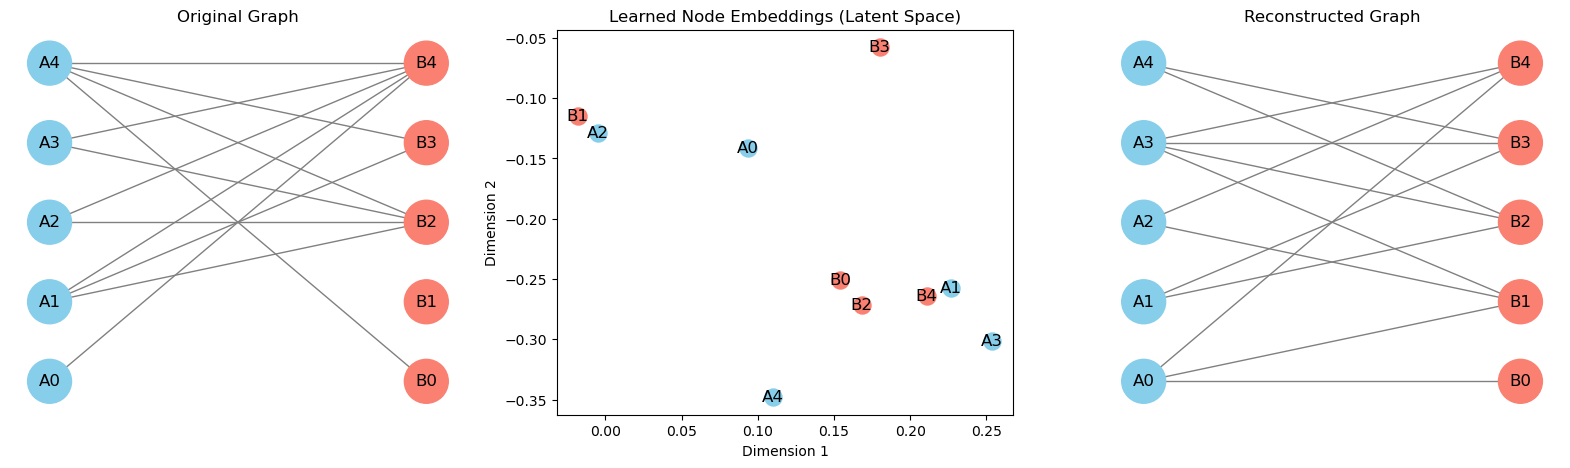

In [8]:
# Re-import necessary libraries after execution reset
import random
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import euclidean_distances
import torch

# ----------------------------
# Step 1: Create a Bipartite Graph
# ----------------------------
num_nodes_set_1 = 5  # Left column
num_nodes_set_2 = 5  # Right column

nodes_set_1 = [f"A{i}" for i in range(num_nodes_set_1)]
nodes_set_2 = [f"B{i}" for i in range(num_nodes_set_2)]
all_nodes = nodes_set_1 + nodes_set_2

random.seed(99)

G = nx.Graph()
G.add_nodes_from(nodes_set_1, bipartite=0)
G.add_nodes_from(nodes_set_2, bipartite=1)

edges = []
for u in nodes_set_1:
    for v in nodes_set_2:
        if random.random() > 0.5:  # 50% chance of an edge
            G.add_edge(u, v)
            edges.append((u, v))

# ----------------------------
# Step 2: Generate Random Walks for Embedding
# ----------------------------
def generate_metapath_walks(G, nodes, walk_length=10, num_walks=10):
    """Generate metapath2vec-style random walks (bipartite alternating)."""
    walks = []
    for _ in range(num_walks):
        for start in nodes:
            walk = [start]
            current = start
            for _ in range(walk_length - 1):
                neighbors = list(G.neighbors(current))
                if not neighbors:
                    break
                if current in nodes_set_1:
                    valid_neighbors = [n for n in neighbors if n in nodes_set_2]
                else:
                    valid_neighbors = [n for n in neighbors if n in nodes_set_1]
                if not valid_neighbors:
                    break
                current = random.choice(valid_neighbors)
                walk.append(current)
            walks.append(walk)
    return walks

walks = generate_metapath_walks(G, all_nodes, walk_length=5, num_walks=10)

# ----------------------------
# Step 3: Train Word2Vec Embeddings
# ----------------------------
embedding_dim = 8
model = Word2Vec(walks, vector_size=embedding_dim, window=3, min_count=0, sg=1, workers=1, epochs=100)
embeddings = {node: model.wv[node] for node in all_nodes}
emb_matrix = torch.tensor(np.array([embeddings[node] for node in all_nodes]), dtype=torch.float)

# ----------------------------
# Step 4: Compute Probabilistic Edge Likelihood
# ----------------------------
def edge_probability(z_i, z_j, alpha=1.0):
    """Compute the probability of an edge given embeddings."""
    dist = np.linalg.norm(z_i - z_j) ** 2  # Squared Euclidean distance
    return 1 / (1 + np.exp(alpha * dist))  # Logistic function

# ----------------------------
# Step 5: Reconstruct a New Bipartite Graph Using Probabilities
# ----------------------------
new_G = nx.Graph()
new_G.add_nodes_from(nodes_set_1, bipartite=0)
new_G.add_nodes_from(nodes_set_2, bipartite=1)

alpha = 0.5  # Scaling factor for probability (tuneable)

for u in nodes_set_1:
    for v in nodes_set_2:
        prob = edge_probability(embeddings[u], embeddings[v], alpha)
        if random.random() < prob:  # Sample based on probability
            new_G.add_edge(u, v)

# ----------------------------
# Step 6: Visualize Original and Reconstructed Graphs
# ----------------------------
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
pos = {node: (0, i) for i, node in enumerate(nodes_set_1)}
pos.update({node: (1, i) for i, node in enumerate(nodes_set_2)})

# Plot Original Graph
nx.draw(G, pos, with_labels=True, node_size=1000, node_color=['skyblue' if n in nodes_set_1 else 'salmon' for n in G.nodes()], edge_color="gray", ax=axes[0])
axes[0].set_title("Original Graph")

# Plot Embeddings
emb_array = emb_matrix.detach().numpy()
for idx, node in enumerate(all_nodes):
    color = 'skyblue' if node in nodes_set_1 else 'salmon'
    axes[1].scatter(emb_array[idx, 0], emb_array[idx, 1], c=color, s=150)
    axes[1].text(emb_array[idx, 0], emb_array[idx, 1], node, fontsize=12, ha='center', va='center')
axes[1].set_title("Learned Node Embeddings (Latent Space)")
axes[1].set_xlabel("Dimension 1")
axes[1].set_ylabel("Dimension 2")

# Plot Reconstructed Graph
nx.draw(new_G, pos, with_labels=True, node_size=1000, node_color=['skyblue' if n in nodes_set_1 else 'salmon' for n in G.nodes()], edge_color="gray", ax=axes[2])
axes[2].set_title("Reconstructed Graph")

plt.show()